In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from pprint import pprint
import _pickle as pickle

import time

In [2]:
# My libraries
import sim_ann as sa
import model

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Perform simulated annealing.

Change the values for min and max temperature and alpha in the file sim_ann.py. 

In [4]:
t0 = time.time()
parameters, cost_hist, parameters_hist = sa.parameter_tuning()
t1 = time.time()
total = t1-t0
print('Total time spent: ', total)

Temp:  1.0
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
{'arousal': [0.8572890826875429, 1.3820279462612552],
 'attention_1': [3.0889448095146275, 3.7487029958329656],
 'attention_2': [0.8350719753623718, 4.291510542819574],
 'comment': [0.7, 10],
 'ff_ent': [1.1727536132023113, 1.7639420968105948],
 'ff_is': [1.842322701388638, 6.229511679603831],
 'ff_ko': [0.9792248099431562, 2.3877370215124265],
 'ff_se': [3.0905402657745893, 2.671415877999905],
 'ff_si': [1.2171642950177333, 3.6717195451995197],
 'like': [0.7, 10],
 'mood': [1.3510159641643147, 2.282225172224012],
 'mood_speed': 0.004378332169723618,
 'prep_comm': [3.381545843079089, 1.0831323578368082],
 'prep_like': [2.92967602717537, 1.7362896566742898],
 'prep_share': [2.309437618791555, 2.463480040390541],
 'satisfaction': [0.9989272380657378, 5.307759105610957],
 'share': [0.7, 10],
 'srs_sal': [0.7388580015138481, 1.2897986309137432]}
479.384570769
Temp:  0.7
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower

Lower!
Lower!
{'arousal': [0.5911110347599692, 1.7480582895752779],
 'attention_1': [4.704510020065103, 1.7027459499758464],
 'attention_2': [0.9084090169784916, 1.589022088595262],
 'comment': [0.7, 10],
 'ff_ent': [1.6013867318258905, 2.0430289596909423],
 'ff_is': [0.20310543652126428, 1.9811795918266155],
 'ff_ko': [0.31446618640738566, 2.2167405581346893],
 'ff_se': [2.614745094464624, 1.043360611518334],
 'ff_si': [0.7061395110652053, 5.118119462255165],
 'like': [0.7, 10],
 'mood': [1.6854053790838555, 7.2914116389367845],
 'mood_speed': 0.09212516771485701,
 'prep_comm': [3.928381744214674, 0.7412152331497652],
 'prep_like': [2.103913232345953, 0.8756877960213689],
 'prep_share': [2.776717911285149, 0.5614372626880716],
 'satisfaction': [0.7813802404189389, 6.975677597440493],
 'share': [0.7, 10],
 'srs_sal': [1.1676896145653861, 0.9440994669974823]}
270.936030404
Temp:  0.028247524899999984
Lower!
{'arousal': [0.6278122509874027, 1.9609107910864179],
 'attention_1': [4.6958886

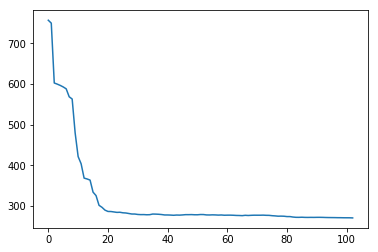

In [5]:
plt.plot(cost_hist)

## Dumping the simulated annealing results

In [6]:
with open('pickle/parameters.txt', 'wb') as fp:
    pickle.dump(parameters, fp)

with open('pickle/cost_hist.txt', 'wb') as fp:
    pickle.dump(cost_hist, fp)

with open('pickle/parameters_hist.txt', 'wb') as fp:
    pickle.dump(parameters_hist, fp)
    

## Loading simulated annealing results

with open ('pickle/parameters.txt', 'rb') as fp:
    parameters = pickle.load(fp)

with open ('pickle/cost_hist.txt', 'rb') as fp:
    cost_hist = pickle.load(fp)

with open ('pickle/parameters_hist.txt', 'rb') as fp:
    parameters_hist = pickle.load(fp)

## Process results

In [7]:
#steepness values from 0.5 (for four arrows), 0.7 (for three arrows),  1 (for two arrows) to 2.5 (for 1 arrow)
a = parameters_hist[-1]

In [8]:
a

{'arousal': [0.627488414950117, 2.5976347960995576],
 'attention_1': [4.5109545083339535, 2.0872790461617075],
 'attention_2': [0.95930601068604, 2.000582575691183],
 'comment': [0.7, 10],
 'ff_ent': [1.5579695749397706, 1.2864801217308965],
 'ff_is': [0.03411884547763, 2.2601223423632515],
 'ff_ko': [0.19065047969307525, 1.7024592189787922],
 'ff_se': [2.5375996837439465, 0.4895783884764786],
 'ff_si': [0.6972875785398175, 5.26765033482945],
 'like': [0.7, 10],
 'mood': [1.5032989904799676, 7.339308043525232],
 'mood_speed': 0.0922606067529039,
 'prep_comm': [3.9465796681442735, 0.7550528505298857],
 'prep_like': [2.0323037957658667, 0.7951453552712788],
 'prep_share': [2.918648656641735, 1.520379701048056],
 'satisfaction': [0.7058349703993353, 7.630073512656468],
 'share': [0.7, 10],
 'srs_sal': [1.0480583758538624, 1.209650536051348]}

In [9]:
new_cost = sa.get_error(a)

In [10]:
new_cost

(270.185700464717,
 {'arousal': [0.627488414950117, 2.5976347960995576],
  'attention_1': [4.5109545083339535, 2.0872790461617075],
  'attention_2': [0.95930601068604, 2.000582575691183],
  'comment': [0.7, 10],
  'ff_ent': [1.5579695749397706, 1.2864801217308965],
  'ff_is': [0.03411884547763, 2.2601223423632515],
  'ff_ko': [0.19065047969307525, 1.7024592189787922],
  'ff_se': [2.5375996837439465, 0.4895783884764786],
  'ff_si': [0.6972875785398175, 5.26765033482945],
  'like': [0.7, 10],
  'mood': [1.5032989904799676, 7.339308043525232],
  'mood_speed': 0.0922606067529039,
  'prep_comm': [3.9465796681442735, 0.7550528505298857],
  'prep_like': [2.0323037957658667, 0.7951453552712788],
  'prep_share': [2.918648656641735, 1.520379701048056],
  'satisfaction': [0.7058349703993353, 7.630073512656468],
  'share': [0.7, 10],
  'srs_sal': [1.0480583758538624, 1.209650536051348]},
           mood      like     share   comment
 19    0.894458  0.194291  0.053475  0.002898
 39    0.983224  0.

In [11]:
mood = 0.5

# Get the traits for the agents
validation_f = 'validation/'

agent1 = pd.read_csv(validation_f+'agent_1.csv')
agent2 = pd.read_csv(validation_f+'agent_2.csv')
agent3 = pd.read_csv(validation_f+'agent_3.csv')

a1_dict = agent1.to_dict()
a2_dict = agent2.to_dict()
a3_dict = agent3.to_dict()

#[pt_con, nf_ko, nf_ent, nf_is, nf_si, nf_se, mood]
a1_traits = [a1_dict['nf_ko'][0], a1_dict['nf_ent'][0], a1_dict['nf_is'][0], 
             a1_dict['nf_si'][0], a1_dict['nf_se'][0], a1_dict['pt_con'][0], mood]
a2_traits = [a2_dict['nf_ko'][0], a2_dict['nf_ent'][0], a2_dict['nf_is'][0], 
             a2_dict['nf_si'][0], a2_dict['nf_se'][0], a2_dict['pt_con'][0], mood]
a3_traits = [a3_dict['nf_ko'][0], a3_dict['nf_ent'][0], a3_dict['nf_is'][0], 
             a3_dict['nf_si'][0], a3_dict['nf_se'][0], a3_dict['pt_con'][0], mood]


# Get validation data set
data_a1 = pd.read_csv(validation_f+'validation_agent_1.csv')
data_a2 = pd.read_csv(validation_f+'validation_agent_2.csv')
data_a3 = pd.read_csv(validation_f+'validation_agent_3.csv')

messages1 = data_a1[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages2 = data_a2[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages3 = data_a3[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]

reactions1 = data_a1[['mood', 'like', 'comment', 'share']]
reactions2 = data_a2[['mood', 'like', 'comment', 'share']]
reactions3 = data_a3[['mood', 'like', 'comment', 'share']]

# Agent 1

In [12]:
inputsDF, parameters = model.run_message_sequence(messages1.values, a1_traits,parameters, 'nb1')

In [13]:
parameters

{'arousal': [0.627488414950117, 2.5976347960995576],
 'attention_1': [4.5109545083339535, 2.0872790461617075],
 'attention_2': [0.95930601068604, 2.000582575691183],
 'comment': [0.7, 10],
 'ff_ent': [1.5579695749397706, 1.2864801217308965],
 'ff_is': [0.03411884547763, 2.2601223423632515],
 'ff_ko': [0.19065047969307525, 1.7024592189787922],
 'ff_se': [2.5375996837439465, 0.4895783884764786],
 'ff_si': [0.6972875785398175, 5.26765033482945],
 'like': [0.7, 10],
 'mood': [1.5032989904799676, 7.339308043525232],
 'mood_speed': 0.0922606067529039,
 'prep_comm': [3.9465796681442735, 0.7550528505298857],
 'prep_like': [2.0323037957658667, 0.7951453552712788],
 'prep_share': [2.918648656641735, 1.520379701048056],
 'satisfaction': [0.7058349703993353, 7.630073512656468],
 'share': [0.7, 10],
 'srs_sal': [1.0480583758538624, 1.209650536051348]}

## Inputs

### Message Categories

Text(0.5,0,'Time step')

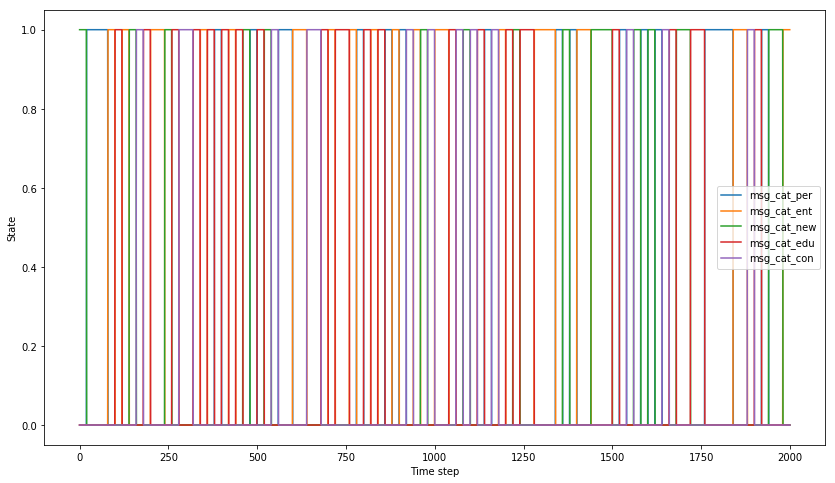

In [14]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

Text(0.5,0,'Time step')

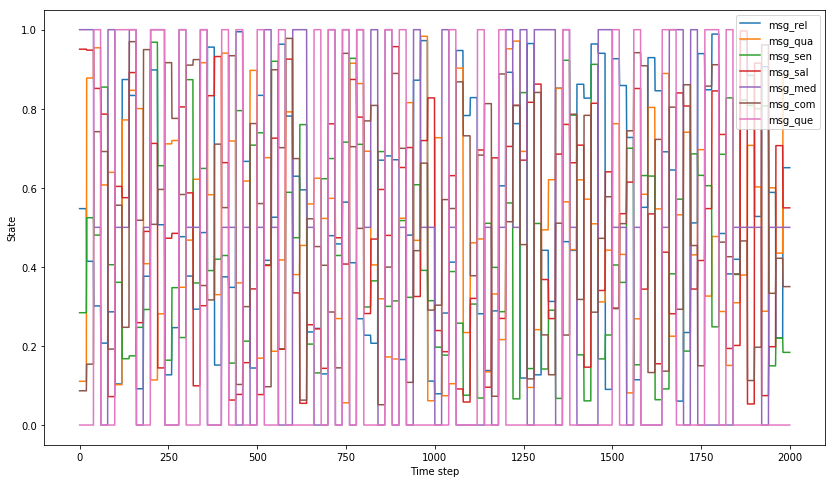

In [15]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

Text(0.5,0,'Time step')

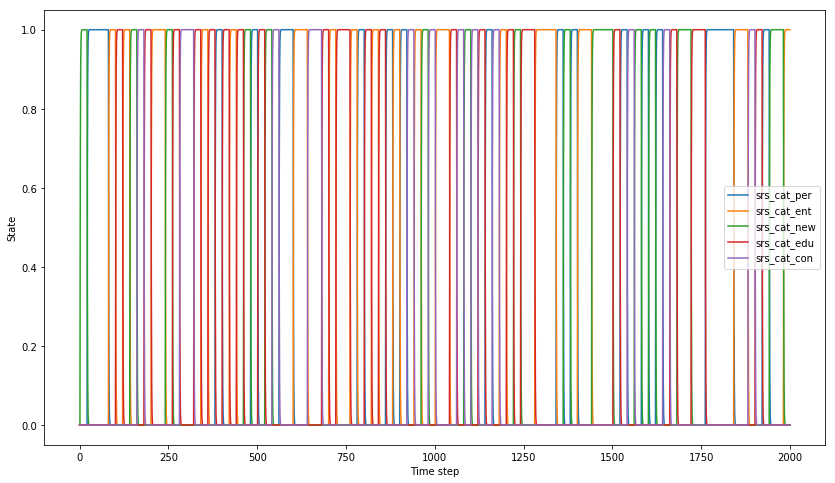

In [16]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

Text(0.5,0,'Time step')

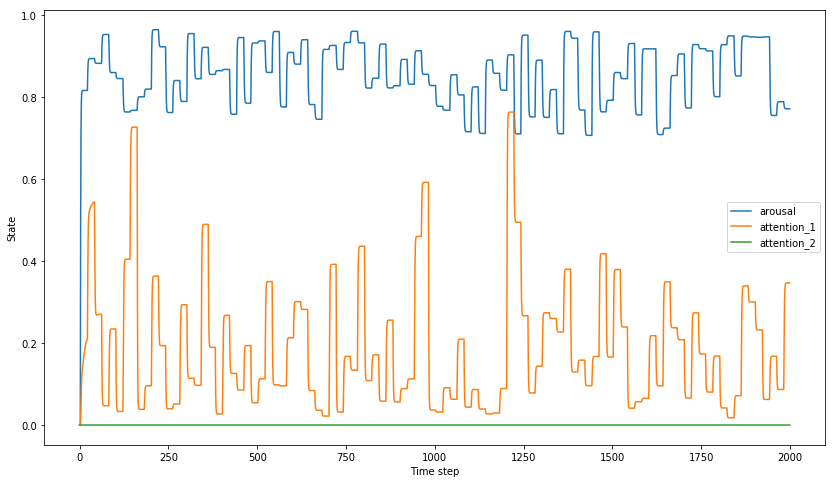

In [17]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### FFs

Text(0.5,0,'Time step')

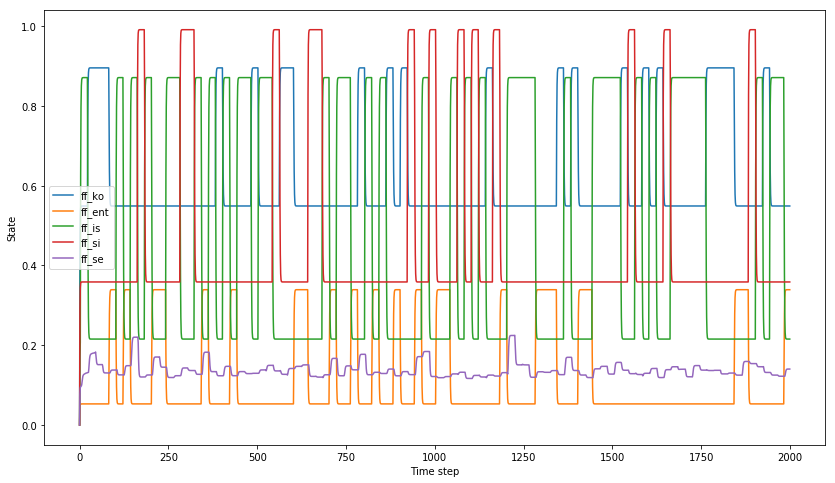

In [18]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction

Text(0.5,0,'Time step')

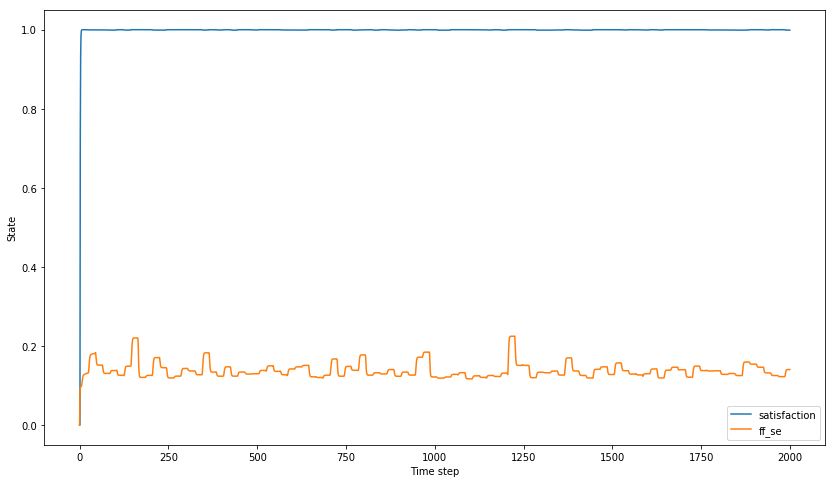

In [19]:
inputsDF[['satisfaction', 'ff_se']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

Text(0.5,0,'Time step')

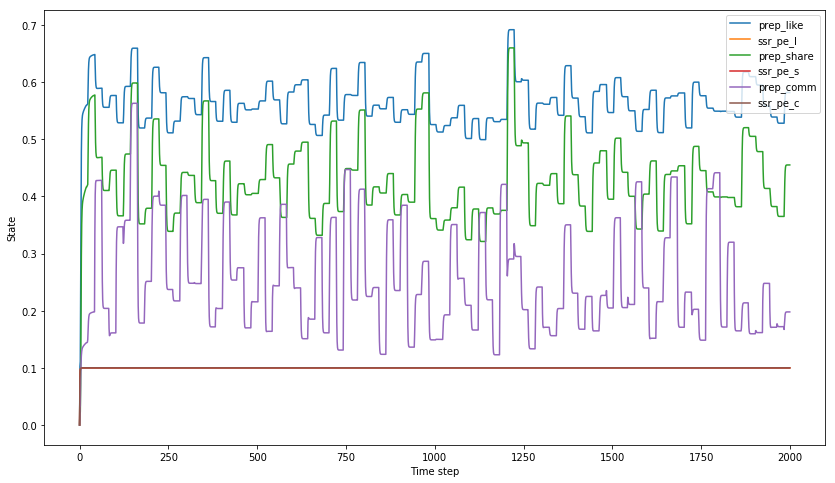

In [20]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Outputs

Text(0.5,0,'Time step')

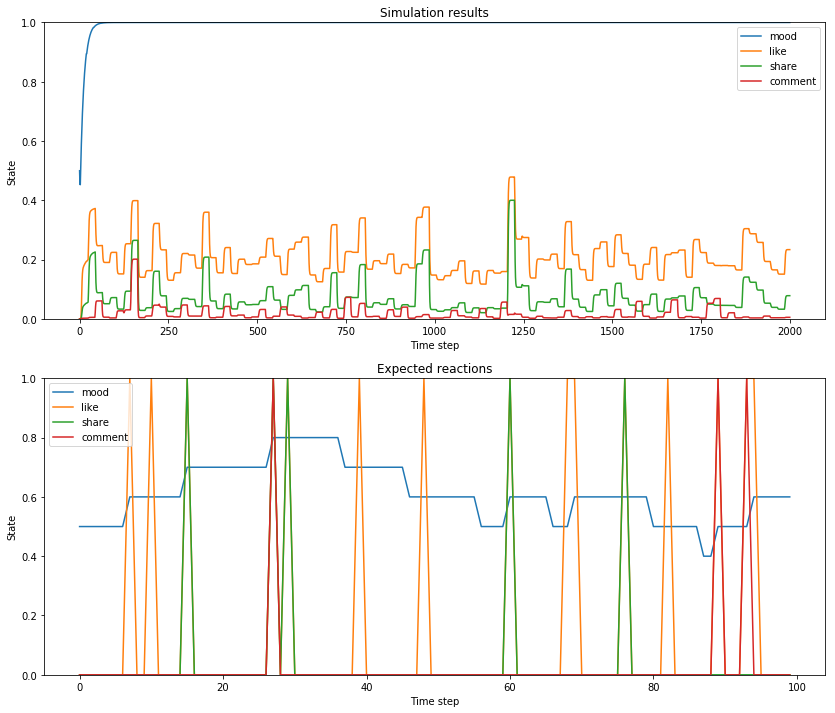

In [21]:
fig = plt.figure(figsize=((14,12)))

ax1 = fig.add_subplot(211)
inputsDF[['mood', 'like', 'share', 'comment']].plot(ax=ax1, title='Simulation results')
plt.ylabel('State')
plt.xlabel('Time step')
plt.ylim(0,1)

ax2 = fig.add_subplot(212)
reactions1[['mood', 'like', 'share', 'comment']].plot(ax=ax2, title='Expected reactions')
plt.ylim(0,1)
plt.ylabel('State')
plt.xlabel('Time step')

#plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns

# Agent 2

In [ ]:
inputsDF, parameters = model.run_message_sequence(messages2.values, a2_traits,parameters, 'nb3')

In [ ]:
parameters

## Inputs

### Message Categories

In [ ]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

In [ ]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

In [ ]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

In [ ]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

In [ ]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

In [ ]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

In [ ]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

In [ ]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

In [ ]:
reactions2[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns

# Agent 3

In [ ]:
inputsDF, parameters = model.run_message_sequence(messages3.values, a3_traits,parameters, 'nb3')

In [ ]:
parameters

## Inputs

### Message Categories

In [ ]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

In [ ]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

In [ ]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

In [ ]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

In [ ]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

In [ ]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

In [ ]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

In [ ]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

In [ ]:
reactions3[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns